In [1]:
import pandas as pd , numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [2]:
Lead_data_dict = pd.read_excel('Leads Data Dictionary.xlsx')

In [3]:
Lead_data_dict[['Unnamed: 1','Unnamed: 2']]

,Unnamed: 1,Unnamed: 2
0,NaN,NaN
1,Variables,Description
2,Prospect ID,A unique ID with which the customer is identified.
3,Lead Number,A lead number assigned to each lead procured.
4,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
5,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
6,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
7,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
8,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
9,TotalVisits,The total number of visits made by the customer on the website.


In [4]:
Lead_score = pd.read_csv('Leads.csv')

In [5]:
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
Lead_score.shape

(9240, 37)

In [7]:
Lead_score.describe(percentiles = [.25 , .5 , .75 , .95 , .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### <font color = 'green'> 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit' seem to have outliers.

In [8]:
Lead_score.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
numerical = 0
categorical = 0
for i in Lead_score.columns:
    if Lead_score[i].dtype in ['int64','float64']:
        numerical+=1
    else :
        categorical +=1
print(f'The total number of Numerical columns : {numerical}')
print(f'The total number of Categorical columns : {categorical}')

The total number of Numerical columns : 7
The total number of Categorical columns : 30


#### <font color = 'green'> The data type of columns seem to be consistent.

# <font color = 'red'><b><u> Data Cleaning

### <font color = 'blue'> Handling 'Select' in categorical columns 

In [10]:
#Checking for 'Select' values

for i in Lead_score.columns :
    if 'Select' in Lead_score[i].values:
        sel = Lead_score[i].value_counts()['Select']
        tot = Lead_score[i].count()
        percent = round((sel/tot)*100,2)
        print(f' Column : {i}')
        print(f"'Select' Keyword occurance : {percent}%")
        print('-------------')
        

 Column : Specialization
'Select' Keyword occurance : 24.89%
-------------
 Column : How did you hear about X Education
'Select' Keyword occurance : 71.7%
-------------
 Column : Lead Profile
'Select' Keyword occurance : 63.48%
-------------
 Column : City
'Select' Keyword occurance : 28.76%
-------------


#### <font color = 'green'> As we can observe that there are select values for many columns.This is because customer did not select any option from the list, hence it shows select.Select values are as good as NULL.

In [11]:
# Converting Select values to NaN

Lead_score = Lead_score.replace('Select' , np.nan)

In [12]:
# After 'NaN' imputation Checking 'Select' level is available or not:-

for i in Lead_score.columns :
    if 'Select' in Lead_score[i].values :
        print(i)

#### <font color = 'green'> 'Select' values are dealt with

### <font color = 'blue'> Checking & Handling Missing values

In [13]:
# Checking for missing values in each column

round(Lead_score.isnull().mean()*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### <font color  = 'green'> Dropping columns with more than 45% missing values

In [14]:
Lead1 = Lead_score.drop(Lead_score.loc[: , round(Lead_score.isnull().mean()*100,2) > 45].columns,axis=1)

In [15]:
Lead1.shape

(9240, 30)

In [16]:
Lead_score.shape

(9240, 37)

#### <font color = 'green'> 7 Columns have been removed from the data

In [17]:
round(Lead1.isnull().mean()*100,2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [18]:
# Checking value counts for 'City' Column

round(Lead1['City'].value_counts(normalize=True)*100,2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

In [19]:
Lead1.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

#### <font color = 'green'> Around 58% of the data is Mumbai , so we can impute Mumbai in the missing values

In [20]:
Lead1.City = Lead1.City.replace(np.nan , 'Mumbai')

In [21]:
# Checking value counts for 'Specialization' column

round(Lead1['Specialization'].value_counts(normalize=True)*100,2)

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

In [22]:
Lead1.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

* #### <font color = 'green'> It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
* #### <font color = 'green'> may not have any specialization or is a student.
* #### <font color = 'green'> Hence we can make a category "Others" for missing values. 

In [23]:
Lead1.Specialization = Lead1.Specialization.replace(np.nan , 'Others')

In [24]:
# Checking value counts for 'Tags' column

round(Lead1['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

In [25]:
Lead1.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

#### <font color = 'green'> Blanks in the tag column may be imputed by 'Will revert after reading the email'.

In [26]:
Lead1.Tags = Lead1.Tags.replace(np.nan , 'Will revert after reading the email')

In [27]:
# Checking value counts for 'What matters most to you in choosing a course' column

round(Lead1['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

In [28]:
Lead1['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

#### <font color = 'green'> Blanks in the this column may be imputed by 'Better Career Prospects'

In [29]:
Lead1['What matters most to you in choosing a course'] = Lead1['What matters most to you in choosing a course'].replace(np.nan , 'Better Career Prospects')

In [30]:
# Checking value counts for 'Occupation' column

round(Lead1['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [31]:
Lead1['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

#### <font color = 'green'> 86% entries are of Unemployed so we can impute "Unemployed" for the missing values

In [32]:
Lead1['What is your current occupation'] = Lead1['What is your current occupation'].replace(np.nan , 'Unemployed')

In [33]:
# Checking value count for 'Country' column

round(Lead1['Country'].value_counts(normalize=True)*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

In [34]:
Lead1.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

#### <font color = 'green'> Country is India for most values so let's impute the same in missing values

In [35]:
Lead1.Country = Lead1.Country.replace(np.nan , 'India')

In [36]:
round(Lead1.isnull().mean()*100,2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Prospect ID                                      0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Tags                                             0.00
Update me on Supply Chain Content                0.00
Newspaper Article                                0.00
Get updates on DM Content                        0.00
City                                             0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
X Education Forums                               0.00
Search                                           0.00
Magazine                    

#### <font color = 'green'> Rest missing values are under 2% so we can drop these rows

In [37]:
Lead1.dropna(inplace = True)

In [38]:
round(Lead1.isnull().mean()*100,2).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

#### <font color = 'green'> The missing values are dealt with

# <font color = 'red'><b><u> Exploratory Data Analysis

In [39]:
Lead1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


## <font color = 'blue'> Univariate Analysis

#### <font color = 'green'>  'Converted' is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [40]:
Converted = round((sum(Lead1.Converted) / len(Lead1.Converted))*100,2)
Converted

37.86

#### <font color = 'green'> A target lead conversion rate of 80% is desired.

#### <b><u> Lead Origin

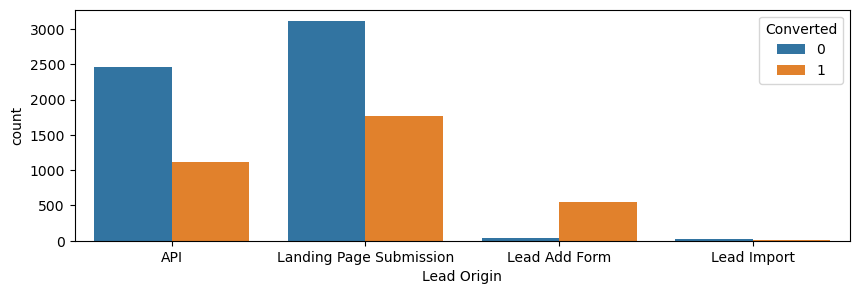

In [41]:
plt.figure(figsize=(10,3))
sns.countplot(x= 'Lead Origin' ,  hue = 'Converted' , data = Lead1)
plt.show()

**Inference: 
* API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
* Lead Add Form has more than 90% conversion rate but count of lead are not very high.
* Lead Import are very less in count

#### <font color = 'green'> To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### <b><u> Lead Source

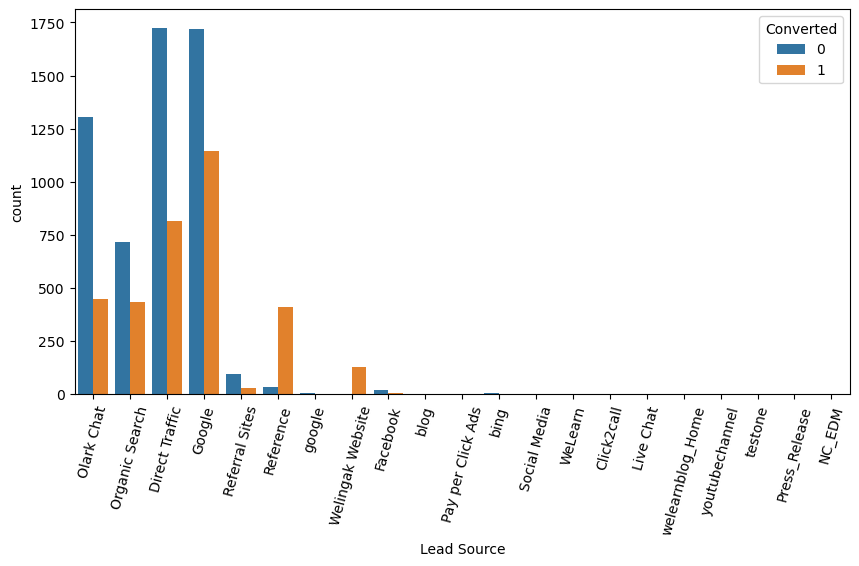

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Lead Source' ,  hue = 'Converted' , data = Lead1)
plt.xticks(rotation=75)
plt.show()

In [43]:
Lead1['Lead Source'] = Lead1['Lead Source'].replace('google' , 'Google')

In [44]:
threshold = 10
lead_count = Lead1['Lead Source'].value_counts()
low_count = lead_count[lead_count < threshold].index.tolist()

In [45]:
Lead1['Lead Source'] = Lead1['Lead Source'].replace(low_count , 'Other_Source')

In [46]:
Lead1['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Other_Source          23
Name: Lead Source, dtype: int64

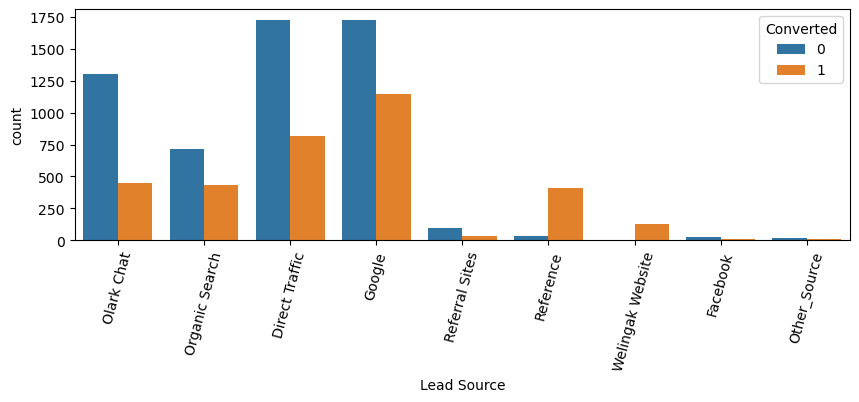

In [47]:
plt.figure(figsize=(10,3))
sns.countplot(x= 'Lead Source' ,  hue = 'Converted' , data = Lead1)
plt.xticks(rotation=75)
plt.show()

**Inference :
* 'Google' and 'Direct traffic' generates maximum number of leads.
* Conversion Rate of 'Reference' leads and leads through 'Welingak Website' is high though the count is low.

#### <font color = 'green'>To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### <b><u> Do Not Email & Do Not Call

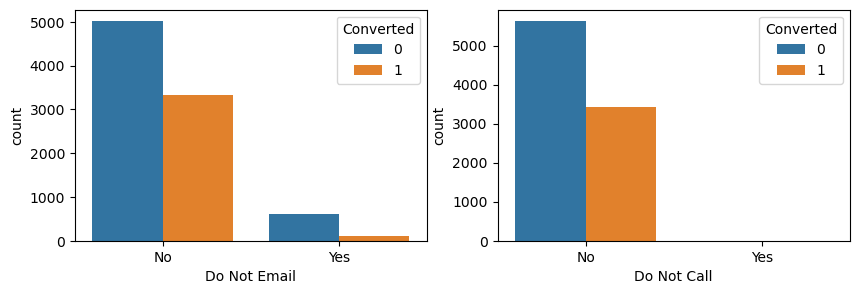

In [48]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email' , hue = 'Converted' , data = Lead1)

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call' , hue = 'Converted' , data = Lead1)

plt.show()

### <b><u> Total Visits

In [49]:
Lead1['TotalVisits'].describe(percentiles = [.25 , .5 , .75 , .95 , .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

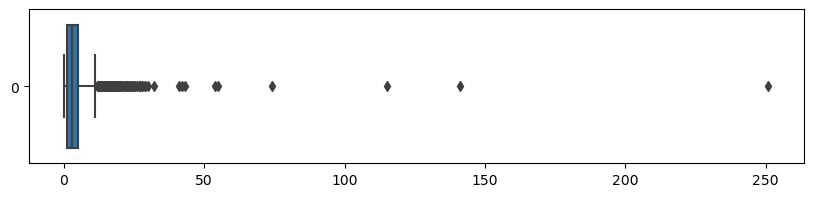

In [50]:
plt.figure(figsize=(10,2))
sns.boxplot(Lead1['TotalVisits'],orient = 'h' )
plt.show()

**As we can see there are a number of outliers in the data , we will cap the outliers to 95% value for analysis.

In [51]:
percentiles = Lead1['TotalVisits'].quantile([0.05 , 0.95]).values
Lead1.TotalVisits = Lead1.TotalVisits.clip(percentiles[0],percentiles[1])

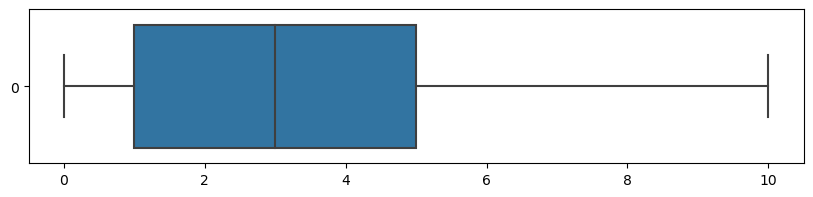

In [52]:
plt.figure(figsize=(10,2))
sns.boxplot(Lead1['TotalVisits'],orient = 'h' )
plt.show()

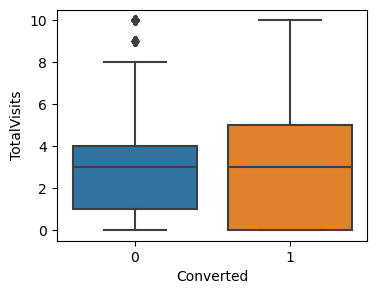

In [53]:
plt.figure(figsize=(4,3))
sns.boxplot(y = 'TotalVisits' , x = 'Converted' , data = Lead1)
plt.show()

**Inference : 
Median for converted and not converted leads are the same

#### <font color = 'green'> Nothng conclusive can be said on the basis of Total Visits.

### <b><u> Total Time Spent on Website

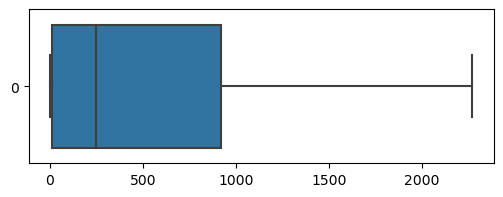

In [54]:
plt.figure(figsize= (6,2))
sns.boxplot(Lead1['Total Time Spent on Website'] , orient = 'h')
plt.show()

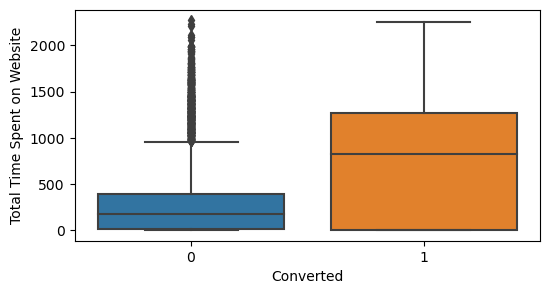

In [55]:
plt.figure(figsize=(6,3))
sns.boxplot(y = 'Total Time Spent on Website' , x = 'Converted' , data = Lead1)
plt.show()

**Inference : 
Leads spending more time on the weblise are more likely to be converted.

#### <font color = 'green'> Website should be made more engaging to make leads spend more time. 

## <b><u> Page Views per Visit

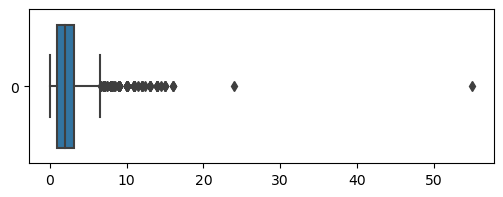

In [56]:
plt.figure(figsize= (6,2))
sns.boxplot(Lead1['Page Views Per Visit'] , orient = 'h')
plt.show()

**As we can see there are a number of outliers in the data , we will cap the outliers to 95% value for analysis.

In [57]:
percentiles = Lead1['Page Views Per Visit'].quantile([0.05 , 0.95]).values
Lead1['Page Views Per Visit'] = Lead1['Page Views Per Visit'].clip(percentiles[0],percentiles[1])

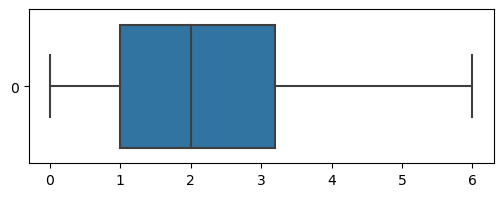

In [58]:
plt.figure(figsize= (6,2))
sns.boxplot(Lead1['Page Views Per Visit'] , orient = 'h')
plt.show()

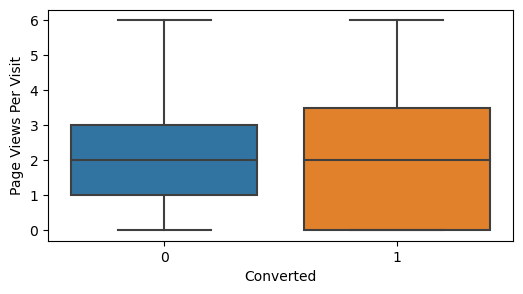

In [59]:
plt.figure(figsize=(6,3))
sns.boxplot(y = 'Page Views Per Visit' , x = 'Converted' , data = Lead1)
plt.show()

**Inference : 
Median for converted and unconverted leads is the same.

#### <font color = 'green'> Nothing can be said specifically for lead conversion from Page Views Per Visit

## <b><u> Last Activity

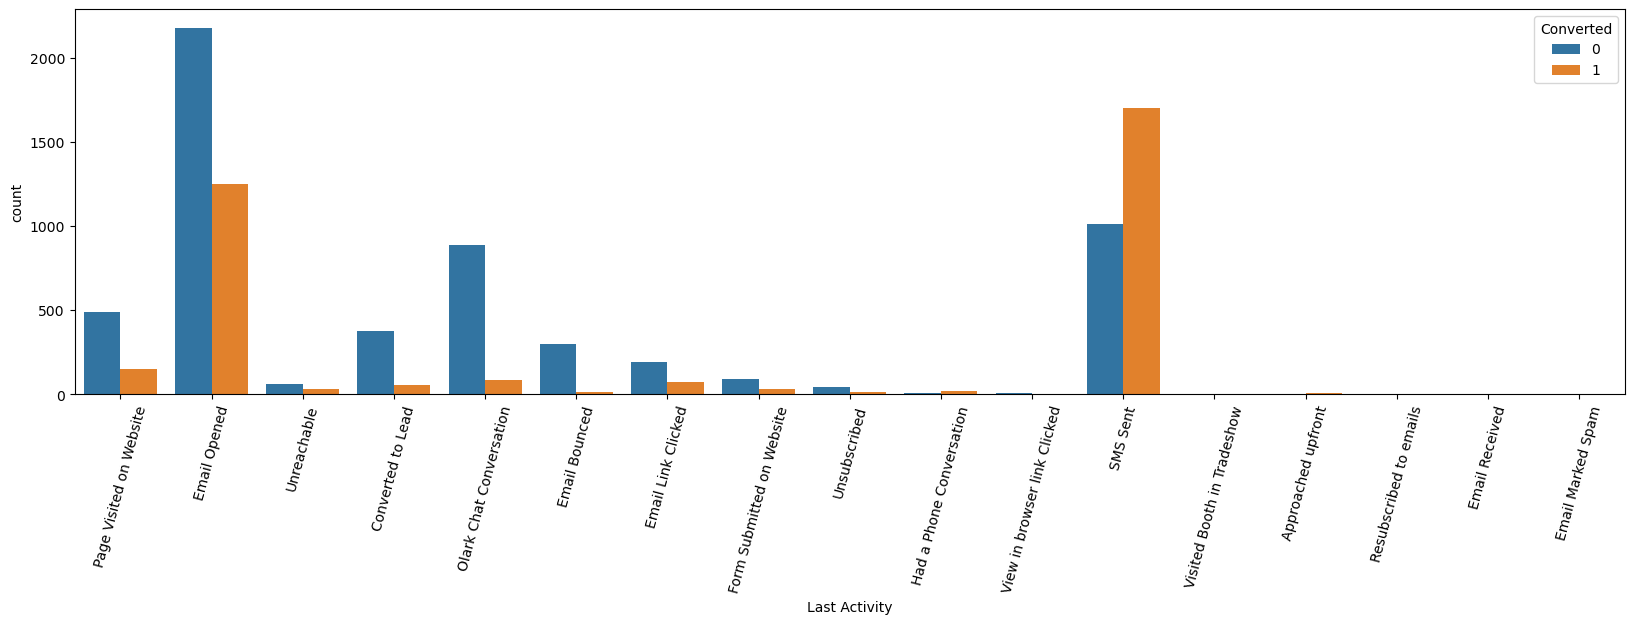

In [60]:
plt.figure(figsize = (20,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead1)
plt.xticks(rotation = 75)
plt.show()

In [61]:
threshold = 20
lead_count = Lead1['Last Activity'].value_counts()
low_count = lead_count[lead_count < threshold].index.tolist()

In [62]:
Lead1['Last Activity'] = Lead1['Last Activity'].replace(low_count , 'Other_Activity')

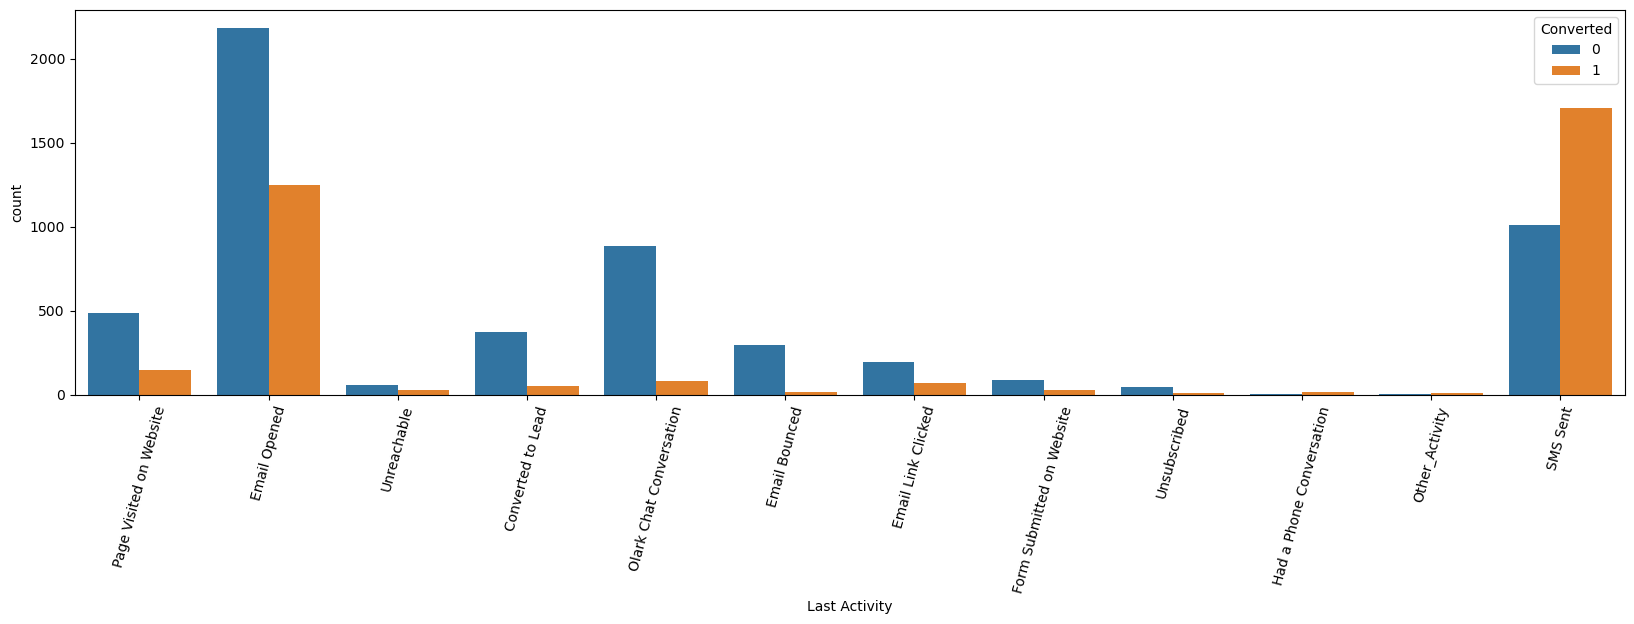

In [63]:
plt.figure(figsize = (20,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead1)
plt.xticks(rotation = 75)
plt.show()

**Inference : 
* Most of the lead have their Email opened as their last activity.
* Conversion rate for leads with last activity as SMS Sent is almost 60%.

## <b><u> Country

In [64]:
Lead1.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

**Inference : 
Most values are 'India' no such inference can be drawn

## <b><u> Specialization

In [65]:
Lead1.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [66]:
Lead1['Specialization'] = Lead1['Specialization'].replace(['Others'], 'Other_Specialization')

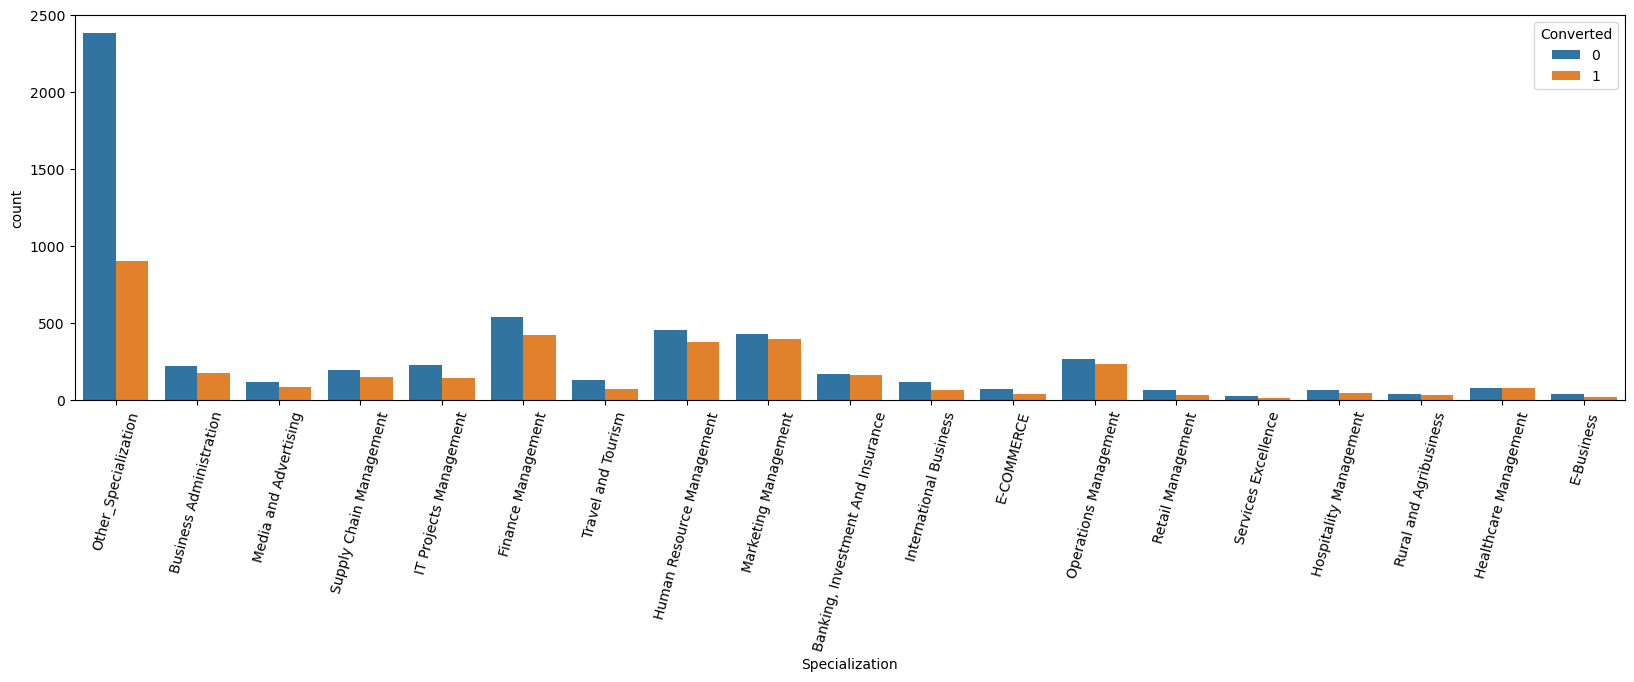

In [67]:
plt.figure(figsize = (20,5))
sns.countplot(x = "Specialization", hue = "Converted", data = Lead1)
plt.xticks(rotation = 75)
plt.show()

**Inference : 
Focus should be more on the Specialization with high conversion rate.

## <b><u> Occupation

In [68]:
Lead1['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [69]:
Lead1['What is your current occupation'] = Lead1['What is your current occupation'].replace(['Other'], 'Other_Occupation')

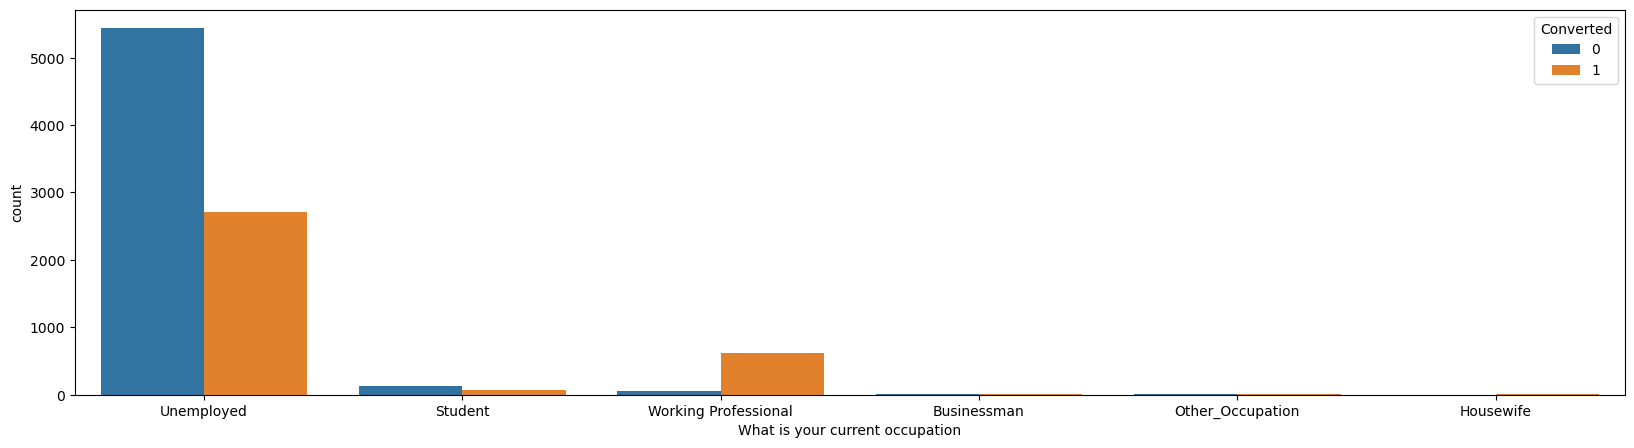

In [70]:
plt.figure(figsize = (20,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead1)
plt.show()

**Inference
* Working Professionals going for the course have high chances of joining it.
* Unemployed leads are the most in numbers but has around 30-35% conversion rate

## <b><u> What matters most to you in choosing a course

In [71]:
Lead1['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

**Inference : 
Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

## <b><u> 'Search' , 'Magazine' , 'Newspaper article' , 'X Education Forums' , 'Newspaper' , 'Digital Advertisement' , 'Through Recommendations' , 'Receive More Updates About Our Course'

In [72]:
cols = ['Search' , 'Magazine' , 'Newspaper Article' , 'X Education Forums' , 'Newspaper' , 
        'Digital Advertisement' , 'Through Recommendations' , 'Receive More Updates About Our Courses']

for i in cols :
    print(Lead1[i].describe())
    print('-------------')

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object
-------------
count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object
-------------
count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object
-------------
count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object
-------------
count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object
-------------
count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object
-------------
count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object
-------------
count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object
-------------


**No inference can be drawn from these parameters.

## <b><u> Tags

In [73]:
Lead1.Tags.describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

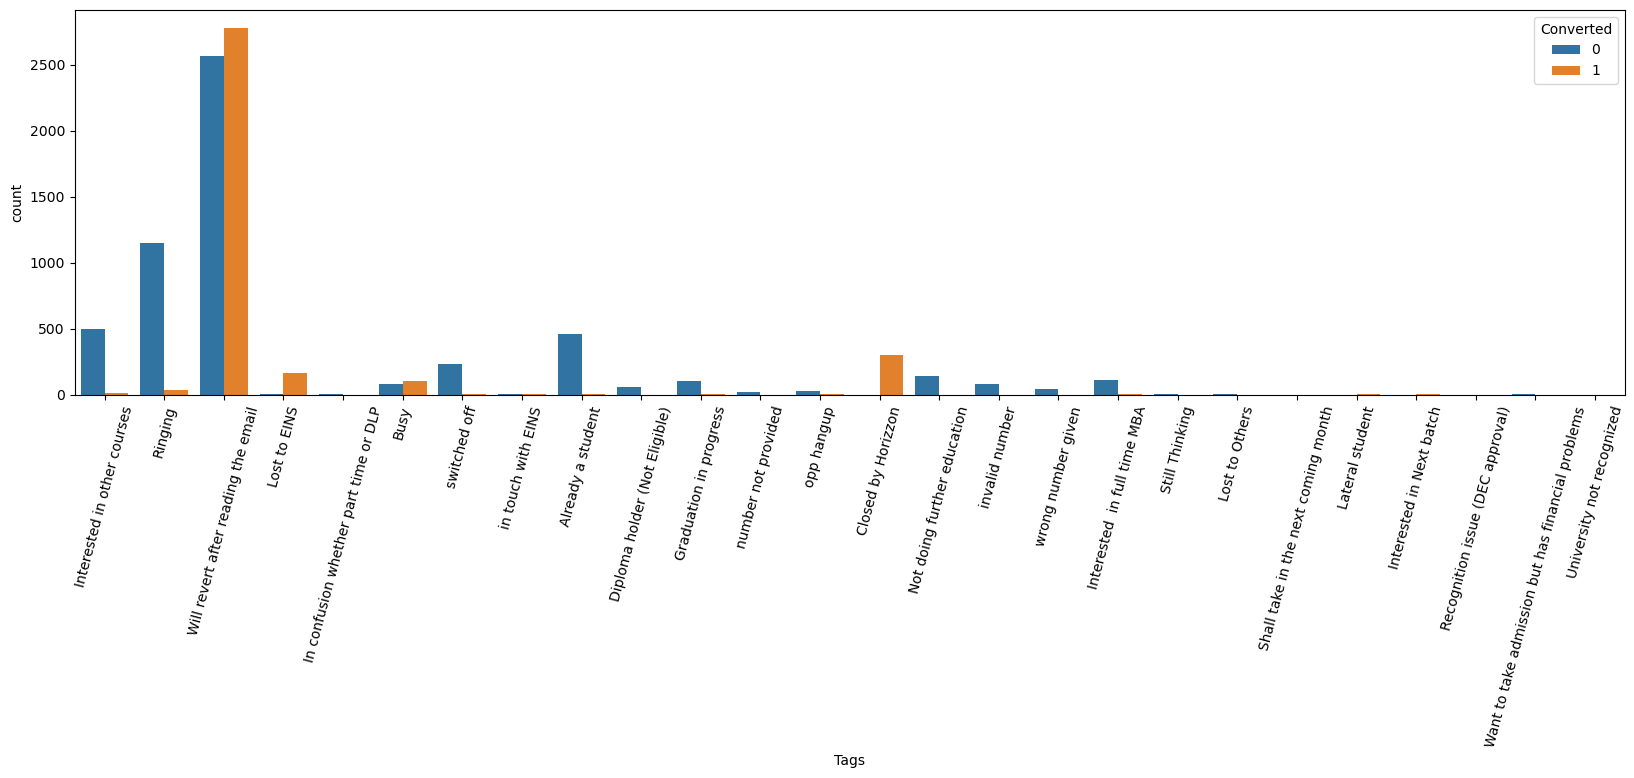

In [74]:
plt.figure(figsize = (20,5))
sns.countplot(x = "Tags", hue = "Converted", data = Lead1)
plt.xticks(rotation = 75)
plt.show()

In [75]:
threshold = 40
lead_count = Lead1['Tags'].value_counts()
low_count = lead_count[lead_count < threshold].index.tolist()

In [76]:
Lead1['Tags'] = Lead1['Tags'].replace(low_count , 'Other_Tag')

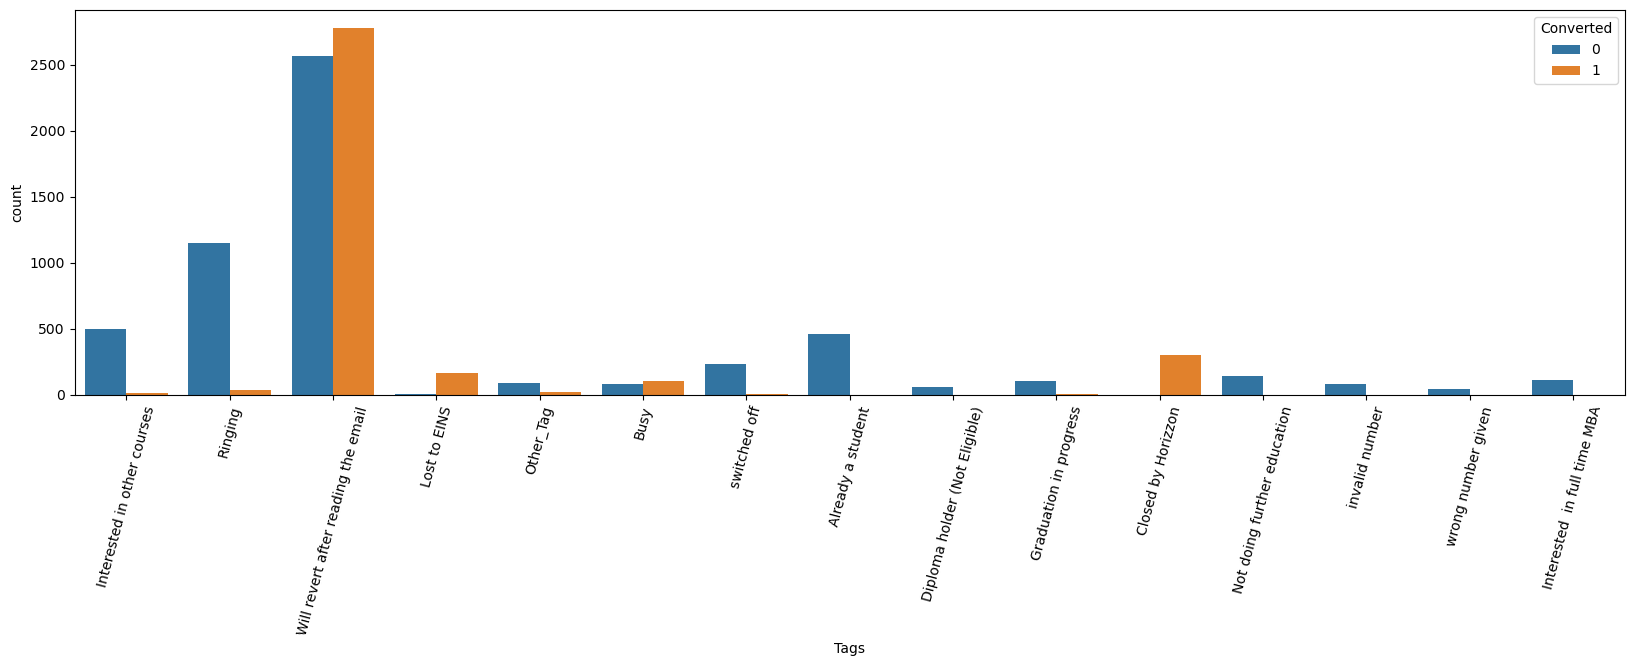

In [77]:
plt.figure(figsize = (20,5))
sns.countplot(x = "Tags", hue = "Converted", data = Lead1)
plt.xticks(rotation = 75)
plt.show()

In [78]:
Lead1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## <b><u> 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview'

In [79]:
cols = ['Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview']

for i in cols :
    print(Lead1[i].describe())
    print('-------------')

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object
-------------
count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object
-------------
count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object
-------------
count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object
-------------


**No inference can be drawn from these parameters.

## <b><u> City

In [80]:
Lead1.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

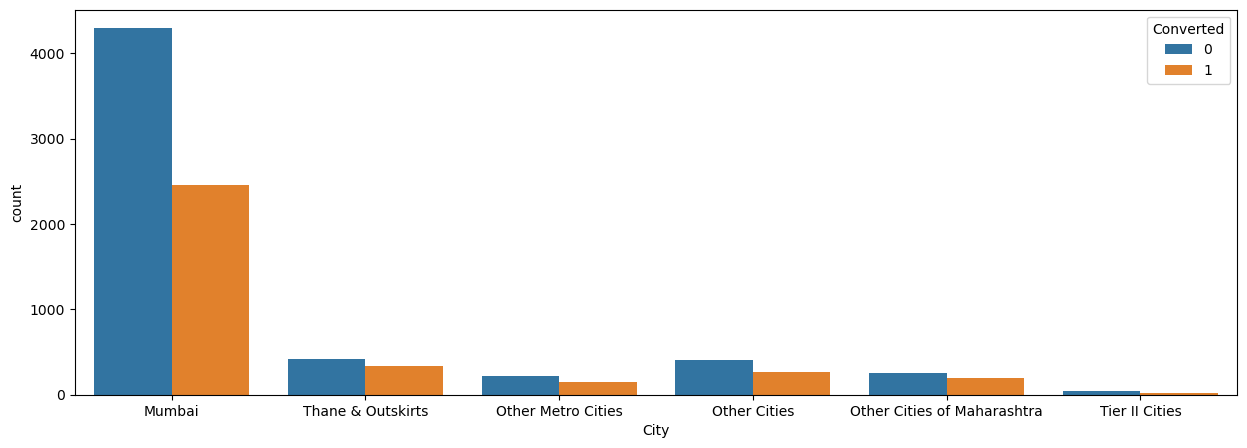

In [81]:
plt.figure(figsize = (15,5))
sns.countplot(x = "City", hue = "Converted", data = Lead1)
plt.show()

**Inference : 
Most leads are from mumbai with around 30% conversion rate.

## <b><u> Last Notable Activity

In [82]:
Lead1['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

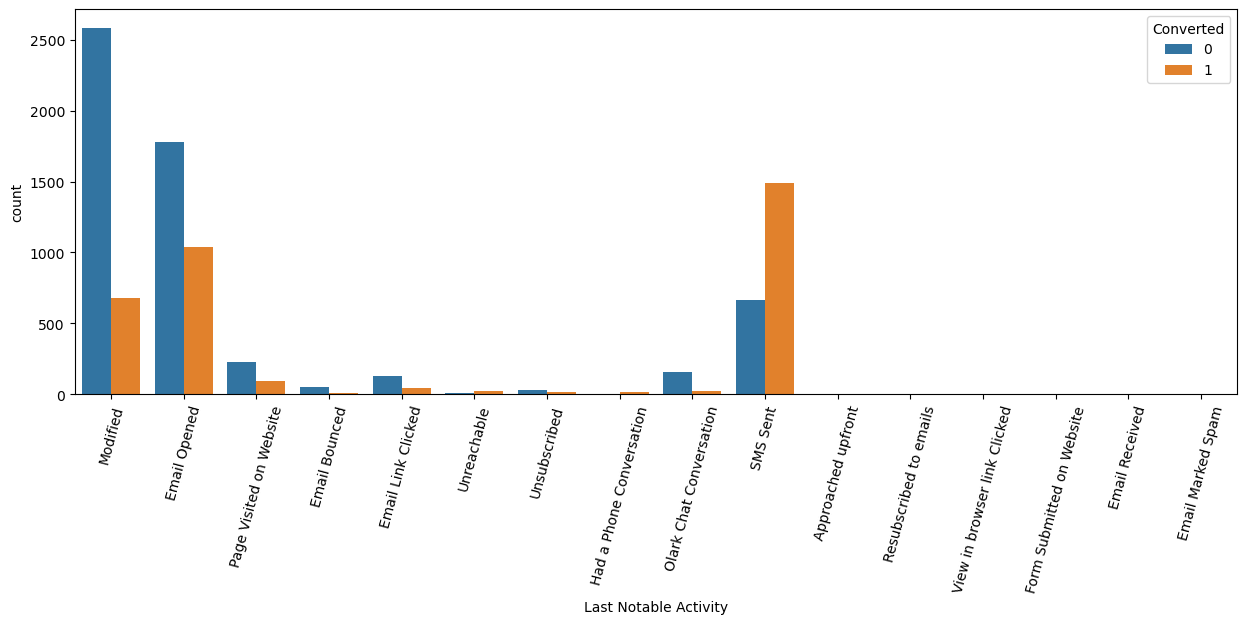

In [83]:
plt.figure(figsize = (15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead1)
plt.xticks(rotation = 75)
plt.show()

## <font color = 'blue'> Results :
#### <font color = 'green'> Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for further analysis

In [84]:
Lead2 = Lead1.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                  'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                  'Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','Country'],axis = 1)

In [85]:
Lead2.shape

(9074, 15)

In [86]:
Lead2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


# <font color = 'red'><u> Data Prepration

### <font color = 'blue'> Converting some binary values (yes/no) to (1/0)

In [87]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
Lead2[varlist] = Lead2[varlist].apply(binary_map)

### <font color = 'blue'> For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [88]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead2[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                               'What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
# Adding the results to the master dataframe
Lead2 = pd.concat([Lead2, dummy1], axis=1)
Lead2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [90]:
Lead2 = Lead2.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                  'What is your current occupation','Tags','City','Last Notable Activity'], axis = 1)

In [91]:
Lead2.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [92]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = Lead2.drop(['Prospect ID','Converted'], axis=1)

In [93]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [94]:
# Putting response variable to y
y = Lead2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [96]:
X_train.shape

(6351, 84)

In [97]:
X_test.shape

(2723, 84)

## <font color = 'red'><u> Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [99]:
# Checking the Churn Rate
Conversion = (sum(Lead2['Converted'])/len(Lead2['Converted'].index))*100
Conversion

37.85541106458012

#### <font color = 'green'> We have almost 38% Lead Conversion

# <font color = 'red'><u> Model Building

### <font color = 'blue'> Running the first Training Model 

In [100]:
import statsmodels.api as sm

In [101]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1558.0
Date:                Sun, 14 Apr 2024   Deviance:                       3116.0
Time:                        16:04:16   Pearson chi2:                 1.26e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5693
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.3069   2.16e+05    9.4e-05      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.5994      0.292     -5.471      0.000      -2.172      -1.026
Do Not Call                                             22.6097    1.4e+05      0.000      1.000   -2.74e+05    2.74e+05
TotalVisits                                              0.1398      0.076      1.833      0.067      -0.010       0.289
Total Time Spent on Website                              1.1754      0.057     20.700      0.000       1.064       1.287
Page Views Per Visit                                    -0.2430      0.084     -2.884      0.004      -0.408      -0.078
Lead Origin_Landing Page Submission                     -1.2552      0.186     -6.760      0.000      -1.619      -0.891
Lead Origin_Lead Add Form                                0.5822      1.267      0.460      0.646      -1.901       3.065
Lead Origin_Lead Import                                 28.2661   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -26.9255   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.1951      0.132      1.483      0.138      -0.063       0.453
Lead Source_Olark Chat                                   0.8297      0.210      3.948      0.000       0.418       1.242
Lead Source_Organic Search                               0.2450      0.180      1.365      0.172      -0.107       0.597
Lead Source_Other_Source                                 0.4203      0.770      0.546      0.585      -1.089       1.929
Lead Source_Reference                                    2.1863      1.307      1.673      0.094      -0.375       4.747
Lead Source_Referral Sites                               0.0003      0.433      0.001      0.999      -0.848       0.849
Lead Source_Welingak Website                             4.3163      1.469      2.939      0.003       1.438       7.195
Last Activity_Email Bounced                             -0.8390      0.817     -1.027      0.304      -2.440       0.762
Last Activity_Email Link Clicked                         0.9011      0.560      1.609      0.108      -0.196       1.999
Last Activity_Email Opened                               0.0112      0.332      0.034      0.973      -0.640       0.662
Last Activity_Form Submitted on Website                  0.0883      0.526      0.168      0.867      -0.942       1.119
Last Activity_Had a Phone Conversation                   3.5874      3.318      1.081      0.280      -2.915      10.090
Last Activity_Olark Chat Conversation                   -0

### <font color = 'blue'> Feature Selection using RFE

In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select =  15)   # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [103]:
rfe.support_

array([ True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False])

In [104]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 49),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 44),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Olark Chat', False, 15),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Other_Source', False, 66),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 65),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Opened', False, 70),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Other_Activity', False, 20),
 ('Last Activity_Page

In [105]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [106]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT P

### <font color = 'blue'> Assesing the model with StatsModels

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1960.4
Date:                Sun, 14 Apr 2024   Deviance:                       3920.9
Time:                        16:04:28   Pearson chi2:                 1.07e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5111
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6846      0.248     -2.762      0.006      -1.170      -0.199
Do Not Email                                  -1.7903      0.206     -8.682      0.000      -2.194      -1.386
Lead Origin_Landing Page Submission           -1.4340      0.148     -9.657      0.000      -1.725      -1.143
Lead Origin_Lead Add Form                      1.7800      0.322      5.520      0.000       1.148       2.412
Lead Source_Welingak Website                   2.5877      0.809      3.199      0.001       1.002       4.173
Last Activity_Had a Phone Conversation         2.7796      1.012      2.747      0.006       0.796       4.763
Last Activity_Unsubscribed                     2.5952      0.548      4.734      0.000       1.521       3.670
Specialization_Other_Specialization           -2.1225      0.151    -14.043      0.000      -2.419      -1.826
What is your current occupation_Unemployed    -2.3770      0.192    -12.392      0.000      -2.753      -2.001
Tags_Busy                                      3.2064      0.296     10.827      0.000       2.626       3.787
Tags_Closed by Horizzon                        8.6054      0.741     11.617      0.000       7.154      10.057
Tags_Lost to EINS                              8.5678      0.743     11.526      0.000       7.111      10.025
Tags_Ringing                                  -0.9849      0.305     -3.231      0.001      -1.582      -0.387
Tags_Will revert after reading the email       3.9547      0.192     20.550      0.000       3.578       4.332
Tags_invalid number                          -21.4387   1.47e+04     -0.001      0.999   -2.87e+04    2.87e+04
Last Notable Activity_SMS Sent                 2.8545      0.113     25.218      0.000       2.633       3.076
==============================================================================================================
"""

In [108]:
col1 = col.drop('Tags_invalid number',1)

In [109]:
col1

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [110]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1963.5
Date:                Sun, 14 Apr 2024   Deviance:                       3927.1
Time:                        16:04:28   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5107
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7400      0.250     -2.959      0.003      -1.230      -0.250
Do Not Email                                  -1.7875      0.206     -8.673      0.000      -2.191      -1.384
Lead Origin_Landing Page Submission           -1.4445      0.149     -9.703      0.000      -1.736      -1.153
Lead Origin_Lead Add Form                      1.7883      0.323      5.531      0.000       1.155       2.422
Lead Source_Welingak Website                   2.5770      0.809      3.186      0.001       0.991       4.163
Last Activity_Had a Phone Conversation         2.7783      1.011      2.747      0.006       0.796       4.761
Last Activity_Unsubscribed                     2.5869      0.547      4.728      0.000       1.514       3.659
Specialization_Other_Specialization           -2.1283      0.152    -14.045      0.000      -2.425      -1.831
What is your current occupation_Unemployed    -2.4066      0.194    -12.437      0.000      -2.786      -2.027
Tags_Busy                                      3.3084      0.295     11.232      0.000       2.731       3.886
Tags_Closed by Horizzon                        8.6980      0.741     11.744      0.000       7.246      10.150
Tags_Lost to EINS                              8.6611      0.743     11.654      0.000       7.205      10.118
Tags_Ringing                                  -0.8790      0.303     -2.900      0.004      -1.473      -0.285
Tags_Will revert after reading the email       4.0486      0.192     21.130      0.000       3.673       4.424
Last Notable Activity_SMS Sent                 2.8388      0.113     25.220      0.000       2.618       3.059
==============================================================================================================
"""

In [111]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.367599
1012    0.113879
9226    0.002121
4750    0.908568
7987    0.983210
1281    0.908568
2880    0.367599
4971    0.952600
7536    0.367599
1248    0.004193
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.36759931, 0.11387904, 0.00212069, 0.90856756, 0.98320973,
       0.90856756, 0.36759931, 0.9525996 , 0.36759931, 0.00419324])

### <font color = 'blue'> Creating a dataframe with the actual converted flag and the predicted probabilities

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.367599,3009
1,0,0.113879,1012
2,0,0.002121,9226
3,1,0.908568,4750
4,1,0.983210,7987


### <font color = 'blue'> Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [114]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.367599,3009,0
1,0,0.113879,1012,0
2,0,0.002121,9226,0
3,1,0.908568,4750,1
4,1,0.983210,7987,1


In [115]:
from sklearn import metrics

In [116]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3739  166]
 [ 643 1803]]


In [117]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.872618485277909


### <font color = 'blue'> Checking VIFs

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,7.23
1,Lead Origin_Landing Page Submission,4.45
12,Tags_Will revert after reading the email,3.45
6,Specialization_Other_Specialization,3.41
2,Lead Origin_Lead Add Form,1.68
11,Tags_Ringing,1.66
14,Last Notable Activity_SMS Sent,1.47
3,Lead Source_Welingak Website,1.34
9,Tags_Closed by Horizzon,1.24
0,Do Not Email,1.18


#### <font color = 'green'> There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'What is your current occupation_Unemployed' has the highest VIF. So let's start by dropping that.

In [120]:
col1 = col1.drop('What is your current occupation_Unemployed',1)
col1

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Other_Specialization', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [121]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2065.3
Date:                Sun, 14 Apr 2024   Deviance:                       4130.5
Time:                        16:04:29   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4947
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6391      0.209    -12.611      0.000      -3.049      -2.229
Do Not Email                                -1.8017      0.198     -9.101      0.000      -2.190      -1.414
Lead Origin_Landing Page Submission         -1.5354      0.146    -10.533      0.000      -1.821      -1.250
Lead Origin_Lead Add Form                    1.9540      0.323      6.058      0.000       1.322       2.586
Lead Source_Welingak Website                 2.3687      0.809      2.928      0.003       0.783       3.954
Last Activity_Had a Phone Conversation       2.7709      1.015      2.730      0.006       0.782       4.760
Last Activity_Unsubscribed                   2.5894      0.518      4.996      0.000       1.573       3.605
Specialization_Other_Specialization         -2.4055      0.150    -16.068      0.000      -2.699      -2.112
Tags_Busy                                    2.9528      0.287     10.304      0.000       2.391       3.514
Tags_Closed by Horizzon                      8.4775      0.737     11.501      0.000       7.033       9.922
Tags_Lost to EINS                            8.3690      0.740     11.307      0.000       6.918       9.820
Tags_Ringing                                -1.2303      0.296     -4.151      0.000      -1.811      -0.649
Tags_Will revert after reading the email     3.8656      0.183     21.094      0.000       3.506       4.225
Last Notable Activity_SMS Sent               2.8009      0.109     25.590      0.000       2.586       3.015
============================================================================================================
"""

In [122]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [123]:
y_train_pred[:10]

array([0.42338296, 0.01081378, 0.00187936, 0.92358188, 0.98514509,
       0.92358188, 0.42338296, 0.95749123, 0.42338296, 0.00447456])

In [124]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [125]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.423383,3009,0
1,0,0.010814,1012,0
2,0,0.001879,9226,0
3,1,0.923582,4750,1
4,1,0.985145,7987,1


In [127]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3745,  160],
       [ 762, 1684]], dtype=int64)

In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8548260116517084


#### <font color = 'green'> So the overall Accuracy hasn't dropped much

### <font color = 'blue'> Lets check the VIFs again

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,3.04
1,Lead Origin_Landing Page Submission,2.55
6,Specialization_Other_Specialization,1.94
2,Lead Origin_Lead Add Form,1.66
10,Tags_Ringing,1.52
12,Last Notable Activity_SMS Sent,1.46
3,Lead Source_Welingak Website,1.34
8,Tags_Closed by Horizzon,1.22
0,Do Not Email,1.18
7,Tags_Busy,1.09


#### <font color = 'green'> All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

### <font color = 'blue'> Metrics beyond Accuracy

In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6884709730171709

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.9590268886043534

In [133]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.040973111395646605


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.913232104121475


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.830929664965609


### <font color = 'blue'> Plotting the ROC Curve

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

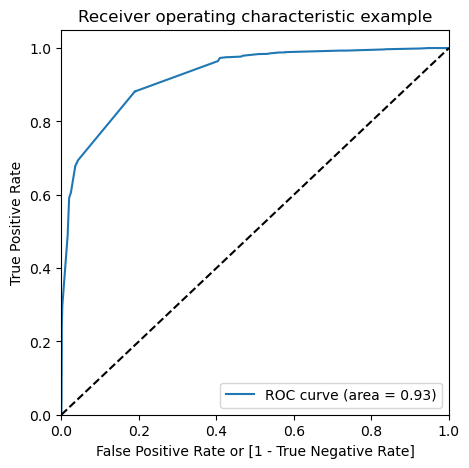

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### <font color='green'> Inference:
    *The primary goal is to maximize the identification of leads that are likely to convert (positive class), then sensitivity should be prioritized. 
    *The sensitivity that we are aiming for is atleast 80% as compared to the 68% that our model has acheived.
    *So , we need to find an optimal cut-off point.

### <font color = 'blue'> Finding Optimal Cut-off point

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.423383,3009,0,1,1,1,1,1,0,0,0,0,0
1,0,0.010814,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.001879,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.923582,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.985145,7987,1,1,1,1,1,1,1,1,1,1,1


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.706031  0.976697  0.536492
0.2   0.2  0.728704  0.975061  0.574392
0.3   0.3  0.836876  0.881848  0.808707
0.4   0.4  0.837821  0.881030  0.810755
0.5   0.5  0.854826  0.688471  0.959027
0.6   0.6  0.855141  0.686018  0.961076
0.7   0.7  0.852622  0.673753  0.964661
0.8   0.8  0.833097  0.605887  0.975416
0.9   0.9  0.795780  0.495912  0.983611


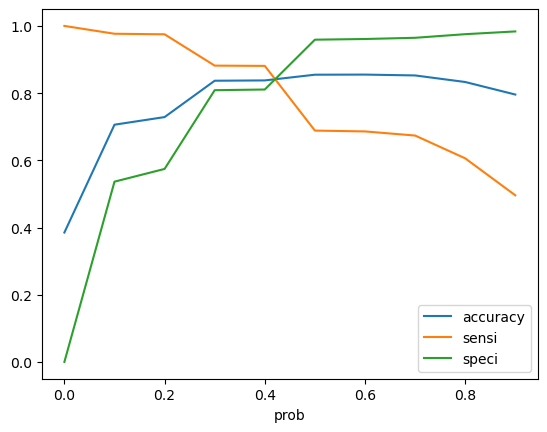

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### <font color = 'green'> From the curve above, 0.41 is the optimum point to take it as a cutoff probability

In [144]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.423383,3009,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.010814,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.001879,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.923582,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.985145,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8379782711384034

In [146]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3168,  737],
       [ 292, 2154]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8806214227309894

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.8112676056338028

In [150]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.18873239436619718


In [151]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7450709097198202


In [152]:
# Negative predictive value
print (TN / float(TN+ FN))

0.915606936416185


#### <font color = 'green'> We see marked improvement in the specifications especially sensitivty and have acheived the target of 80%

### <font color = 'blue'> Making Predictions on the Test set

In [153]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.643547,1.887326,1.510766,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [154]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Unsubscribed,Specialization_Other_Specialization,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,1,0,0,0,0,1,0
1490,0,1,0,0,0,0,0,0,0,0,0,1,0
7936,0,0,0,0,0,0,1,0,0,0,0,1,0
4216,0,0,1,0,0,0,0,0,1,0,0,0,0
3830,0,1,0,0,0,0,0,0,0,0,0,1,0


In [155]:
X_test_sm = sm.add_constant(X_test)

In [156]:
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

3271    0.235236
1490    0.423383
7936    0.235236
4216    0.999587
3830    0.423383
1800    0.423383
6507    0.068886
4821    0.015149
4223    0.972774
4714    0.235236
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
# Let's see the head
y_pred_1.head()

,0
3271,0.235236
1490,0.423383
7936,0.235236
4216,0.999587
3830,0.423383


In [160]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [161]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

,Converted,CustID,0
0,0,3271,0.235236
1,1,1490,0.423383
2,0,7936,0.235236
3,1,4216,0.999587
4,0,3830,0.423383


In [165]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [167]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [168]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,3271,0,0.235236
1,1490,1,0.423383
2,7936,0,0.235236
3,4216,1,0.999587
4,3830,0,0.423383


In [169]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [170]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,3271,0,0.235236,0
1,1490,1,0.423383,1
2,7936,0,0.235236,0
3,4216,1,0.999587,1
4,3830,0,0.423383,1


In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8255600440690415

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  338],
       [ 137,  852]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8614762386248737

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.8050749711649365

In [176]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.19492502883506344


In [177]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7159663865546219


In [178]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.9106327462491846


## <font color = 'red'><u> Observation :

### <font color = 'blue'> The sensitivity value for both test data and train data is above 80%(which was our target) . The accuracy values is  82% , which shows that model is performing well for test data set also.

## <font color = 'red'><u> Determining top features based on final model(logm3)

In [186]:
pd.options.display.float_format = '{:.2f}'.format # Setting format option
res.params

const                                      -2.64
Do Not Email                               -1.80
Lead Origin_Landing Page Submission        -1.54
Lead Origin_Lead Add Form                   1.95
Lead Source_Welingak Website                2.37
Last Activity_Had a Phone Conversation      2.77
Last Activity_Unsubscribed                  2.59
Specialization_Other_Specialization        -2.41
Tags_Busy                                   2.95
Tags_Closed by Horizzon                     8.48
Tags_Lost to EINS                           8.37
Tags_Ringing                               -1.23
Tags_Will revert after reading the email    3.87
Last Notable Activity_SMS Sent              2.80
dtype: float64

In [185]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = res.params
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature.sort_values(ascending = False)

Tags_Closed by Horizzon                    100.00
Tags_Lost to EINS                           98.72
Tags_Will revert after reading the email    45.60
Tags_Busy                                   34.83
Last Notable Activity_SMS Sent              33.04
Last Activity_Had a Phone Conversation      32.69
Last Activity_Unsubscribed                  30.54
Lead Source_Welingak Website                27.94
Lead Origin_Lead Add Form                   23.05
Tags_Ringing                               -14.51
Lead Origin_Landing Page Submission        -18.11
Do Not Email                               -21.25
Specialization_Other_Specialization        -28.37
const                                      -31.13
dtype: float64

## <font color = 'red'><u> Final Model Equation :

### <font color = 'blue'> Converted = 100 Tags_Closed by Horizon + 98.72 Tags_Lost to EINS + 45.60 Tags_Will revert after reading the email + 34.83 Tags_Busy + 33.04 Last Notable Activity_SMS Sent + 32.69 Last Activity_Had a Phone Conversation + 30.54 Last Activity_Unsubscribed + 27.94 Lead Source_Welingak Website  + 23.05 Lead Origin_Lead Add Form - 14.51 Tags_Ringing - 18.11 Lead Origin_Landing Page Submission - 21.25 Do Not Email - 28.37 Specialization_Other_Specialization - 31.13

## <font color = 'red'><u> Final Observations :

### <font color = 'blue'> Evaluation Metrics for the Train DataSet

#### <font color = 'green'> *Accuracy : 83%
#### <font color = 'green'> *Sensitivity : 88% 
#### <font color = 'green'> *Specificity : 74%
#### <font color = 'green'> *Precision : 83%
#### <font color = 'green'> *Recall : 88%

### <font color = 'blue'> Evaluation Metrics for the Test DataSet

#### <font color = 'green'> *Accuracy : 82%
#### <font color = 'green'> *Sensitivity : 86% 
#### <font color = 'green'> *Specificity : 80%
#### <font color = 'green'> *Precision : 71%
#### <font color = 'green'> *Recall : 86%

## <font color = 'red'><u> Recommendations : 

### <font color = 'blue'> To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :-
#### <font color= 'green'> 1.Focus on High-Value Tags: Prioritize leads with tags such as "Closed by Horizon" and "Lost to EINS," as they have a strong positive impact on conversion.
#### <font color= 'green'> 2.Engage with Active Leads: Actively engage with leads who exhibit positive engagement signals, such as "Will revert after reading the email" and "Had a Phone Conversation."
#### <font color= 'green'> 3.Leverage Effective Channels: Utilize channels like SMS communication and the Welingak website to effectively engage leads and increase conversion rates.
#### <font color= 'green'> 4.Address Negative Signals: Identify and address negative signals such as "Busy" or "Unsubscribed" to mitigate their impact on conversion.
#### <font color= 'green'> 5.Optimize Lead Origin and Specialization: Further investigate the impact of lead origin and specialization on conversion and consider optimizing strategies accordingly.
#### <font color= 'green'> 6.Continuous Monitoring and Adaptation: Regularly monitor the performance of predictor variables and adapt strategies to maximize conversion rates over time.